# Efficiency energy thresholds
We measure the thresholds for proton and electron energy that we apply to measure our selection efficiencies.

In [1]:
import ROOT
ROOT.gROOT.ProcessLine("gErrorIgnoreLevel = 2002;")
import efficiency as e
from settings import PROTON_THRESHOLD, ELECTRON_THRESHOLD

Welcome to JupyROOT 6.14/04


In [2]:
import importlib    # This command makes sure we load the last version of the module
importlib.reload(e) # No need to restart the kernel after modifications

<module 'efficiency' from '/Users/soleti/uboone/nue_selection_plots/efficiency.py'>

In [3]:
p_preliminary = ROOT.TPaveText(0.08, 0.88, 0.5, 1, "NDC")
p_preliminary.SetFillStyle(0)
p_preliminary.SetBorderSize(0)
p_preliminary.AddText("MicroBooNE Simulation Preliminary")

In order to increae our statistics we select all the events with an electron in the final state, starting in the fiducial volume.

In [4]:
e.PROTON_THRESHOLD = 0
e.ELECTRON_THRESHOLD = 0

eff = e.efficiency(
    "data_files/mc_nue_sbnfit", ["proton_energy", "electron_energy"],
    systematics=True,
    scale=1,
    is_1e1p=True)


In [7]:
eff_proton_energy = eff["proton_energy"]
eff_electron_energy = eff["electron_energy"]

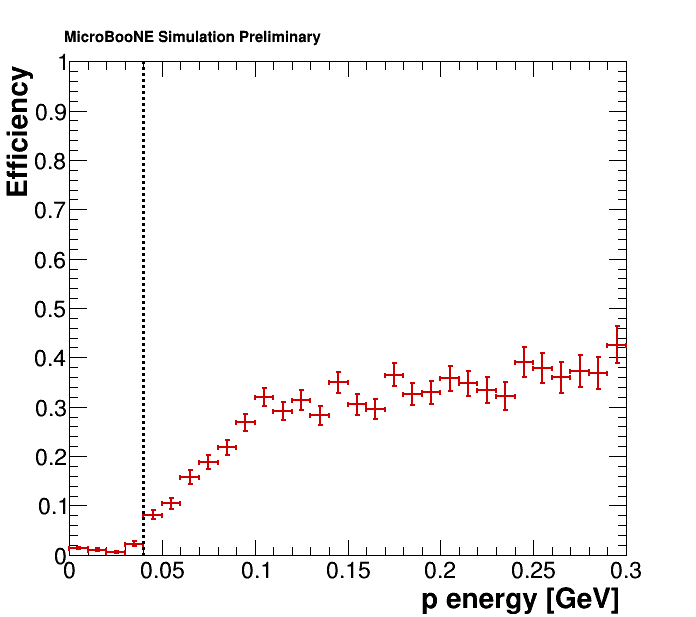

In [9]:
c_eff_proton_energy_sys, eff_proton_energy_stat, eff_proton_energy_sys, h_2d, l_proton_energy_eff = eff_proton_energy.draw(systematics=False, uni=False)
p_preliminary.Draw()
l_proton_energy_eff.Clear()
l_proton_energy_eff.AddEntry(eff_proton_energy_stat, "Selection efficiency", "le")
# c_eff_proton_energy_sys.SetLeftMargin(0.12)
c_eff_proton_energy_sys.Draw()

line_p = ROOT.TLine(PROTON_THRESHOLD, 0, PROTON_THRESHOLD, 1)
line_p.SetLineWidth(3)
line_p.SetLineStyle(2)
line_p.Draw()
eff_proton_energy_stat.GetPaintedGraph().GetXaxis().SetLimits(0, 0.3)
eff_proton_energy_stat.GetPaintedGraph().GetYaxis().SetTitleOffset(0.9)
eff_proton_energy_stat.GetPaintedGraph().SetMaximum(1)
eff_proton_energy_stat.GetPaintedGraph().SetMinimum(0)

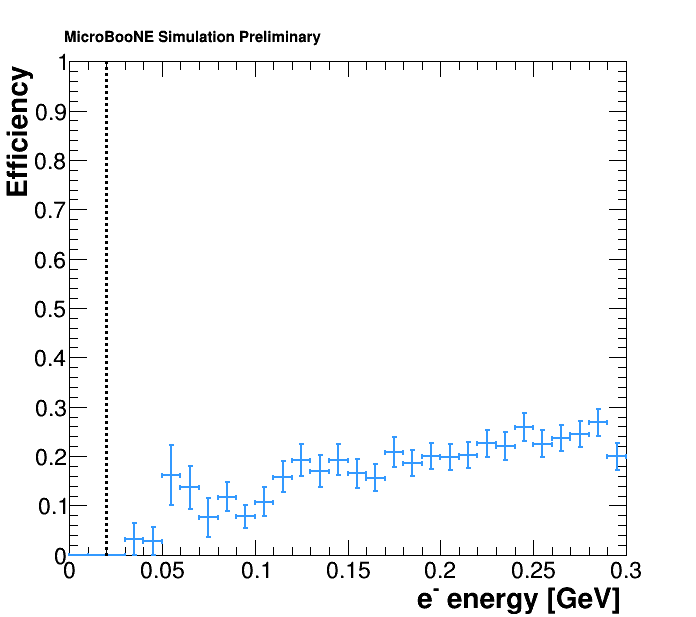

In [12]:
c_eff_electron_energy_sys, eff_electron_energy_stat, eff_electron_energy_sys, h_2d, l_electron_energy_eff = eff_electron_energy.draw(
    systematics=False, uni=False)
p_preliminary.Draw()
eff_electron_energy_stat.SetLineColor(ROOT.kAzure + 1)
c_eff_electron_energy_sys.Draw()
l_electron_energy_eff.Clear()
l_electron_energy_eff.AddEntry(eff_electron_energy_stat,
                               "Selection efficiency", "le")
line_e = ROOT.TLine(ELECTRON_THRESHOLD, 0, ELECTRON_THRESHOLD, 1)
line_e.SetLineWidth(3)
line_e.SetLineStyle(2)
line_e.Draw()
eff_electron_energy_stat.GetPaintedGraph().GetXaxis().SetLimits(0, 0.3)
eff_electron_energy_stat.GetPaintedGraph().GetYaxis().SetTitleOffset(0.9)
eff_electron_energy_stat.GetPaintedGraph().SetMaximum(1)
eff_electron_energy_stat.GetPaintedGraph().SetMinimum(0)